# 1. Install Dependencies and Setup

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers+
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.layers import Dense, Flatten, Dropout
from keras import Model
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout, BatchNormalization,MaxPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# 2. Load Data

In [ ]:
train_dir = 'train'
validation_dir = 'valid'
test_dir = "test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 1, width_shift_range = 0.01, height_shift_range = 0.02, shear_range = 0.0, zoom_range = 0.2, horizontal_flip = False, fill_mode = 'nearest')

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
batch_s = 250
image_size = 150

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = batch_s, class_mode = 'sparse', target_size = (image_size,image_size), shuffle=True, seed=60 , color_mode='rgb')

Found 13492 images belonging to 100 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = batch_s, class_mode = 'sparse', target_size = (image_size,image_size),shuffle=False, seed=60 , color_mode='rgb')

Found 500 images belonging to 100 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory( test_dir,  batch_size = batch_s, class_mode = 'sparse', target_size = (image_size,image_size),shuffle=False, seed=60 , color_mode='rgb')

Found 500 images belonging to 100 classes.


In [ ]:
print(len(train_generator))
print(len(validation_generator))
print(len(test_generator))

54
2
2


In [ ]:
batch = train_generator.next()

In [ ]:
print('Batch shape:', batch[0].shape)

Batch shape: (250, 150, 150, 3)


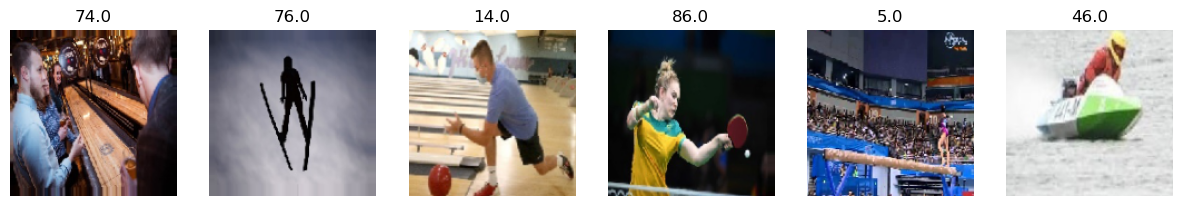

In [ ]:
fig, ax = plt.subplots(ncols=6, figsize=(15,15))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].axis('off')

# 3. Build Deep Learning Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size,image_size, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])


In [ ]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer=Adam(learning_rate=0.01),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_55 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 37, 37, 128)     

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True,show_dtype=True, show_layer_names=True, dpi=120)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# 4. Train

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor='val_loss')
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, verbose=1)

In [ ]:
hist = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    callbacks=[tensorboard_callback, early_stopping,lr_scheduler])

Epoch 1/20
53/53 [==============================] - 47s 871ms/step - loss: 4.4021 - accuracy: 0.0418 - val_loss: 4.0207 - val_accuracy: 0.0940 - lr: 0.0010
Epoch 2/20
53/53 [==============================] - 51s 954ms/step - loss: 3.5498 - accuracy: 0.1586 - val_loss: 3.1436 - val_accuracy: 0.2340 - lr: 0.0010
Epoch 3/20
53/53 [==============================] - 49s 919ms/step - loss: 2.9349 - accuracy: 0.2824 - val_loss: 2.7595 - val_accuracy: 0.3300 - lr: 0.0010
Epoch 4/20
53/53 [==============================] - 48s 898ms/step - loss: 2.4699 - accuracy: 0.3774 - val_loss: 2.6046 - val_accuracy: 0.3480 - lr: 0.0010
Epoch 5/20
53/53 [==============================] - 46s 871ms/step - loss: 2.0990 - accuracy: 0.4591 - val_loss: 2.4211 - val_accuracy: 0.4120 - lr: 0.0010
Epoch 6/20
53/53 [==============================] - 49s 926ms/step - loss: 1.8208 - accuracy: 0.5291 - val_loss: 2.3414 - val_accuracy: 0.4140 - lr: 0.0010
Epoch 7/20
53/53 [==============================] - 46s 874ms/st

# 5. Plot Performance

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


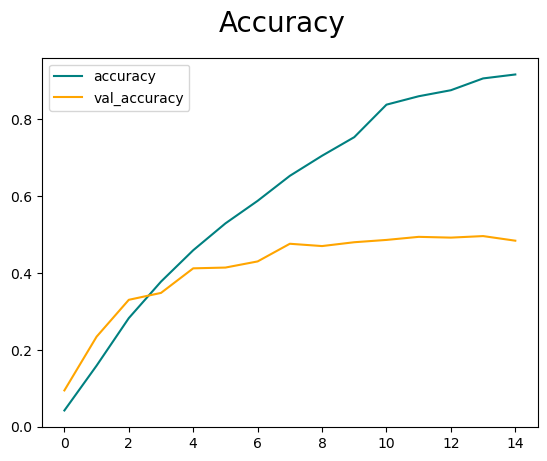

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

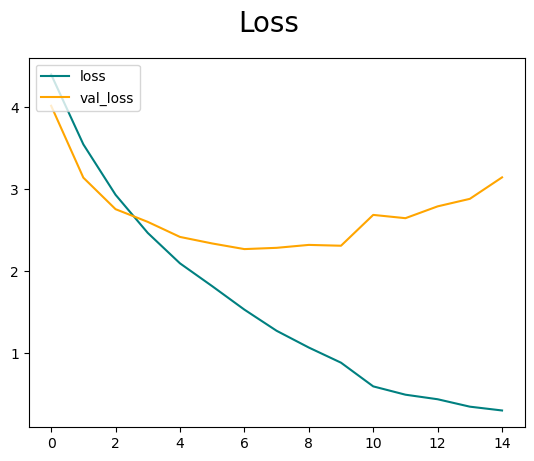

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 6. Evaluate

In [ ]:
# Evaluate the model on Train, Validation and Test data
evaluation = model.evaluate(train_generator)
print(f"Train Loss: {evaluation[0]:.4f}")
print(f"Train Accuracy: {evaluation[1]:.4f}")


evaluation2 = model.evaluate(validation_generator)
print(f"Validation Loss: {evaluation2[0]:.4f}")
print(f"Validation Accuracy: {evaluation2[1]:.4f}")

evaluation3 = model.evaluate(test_generator)
print(f"Validation Loss: {evaluation3[0]:.4f}")
print(f"Validation Accuracy: {evaluation3[1]:.4f}")


54/54 [==============================] - 47s 860ms/step - loss: 1.2715 - accuracy: 0.6622
Train Loss: 1.2715
Train Accuracy: 0.6622
2/2 [==============================] - 1s 257ms/step - loss: 2.2727 - accuracy: 0.4300
Validation Loss: 2.2727
Validation Accuracy: 0.4300
2/2 [==============================] - 1s 252ms/step - loss: 2.1200 - accuracy: 0.4880
Validation Loss: 2.1200
Validation Accuracy: 0.4880


In [ ]:
y_pred = model.predict(train_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = train_generator.classes

print("\nClassification Report On Train:")
print(classification_report(y_true, y_pred_classes, zero_division=0))

54/54 [==============================] - 54s 997ms/step

Classification Report On Train:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       112
           1       0.00      0.00      0.00       112
           2       0.01      0.02      0.01       132
           3       0.00      0.00      0.00        99
           4       0.01      0.01      0.01       113
           5       0.01      0.01      0.01       147
           6       0.01      0.01      0.01       123
           7       0.02      0.02      0.02       174
           8       0.02      0.02      0.02       169
           9       0.01      0.01      0.01       108
          10       0.03      0.03      0.03       110
          11       0.01      0.01      0.01       145
          12       0.01      0.01      0.01       140
          13       0.01      0.01      0.01       138
          14       0.02      0.02      0.02       120
          15       0.01      0.02      0.02   

In [ ]:
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = validation_generator.classes

print("\nClassification Report On Train:")
print(classification_report(y_true, y_pred_classes, zero_division=0))

2/2 [==============================] - 1s 344ms/step

Classification Report On Train:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.20      0.33         5
           2       0.17      0.20      0.18         5
           3       1.00      1.00      1.00         5
           4       0.75      0.60      0.67         5
           5       0.17      0.20      0.18         5
           6       0.80      0.80      0.80         5
           7       0.20      0.20      0.20         5
           8       0.38      0.60      0.46         5
           9       1.00      0.40      0.57         5
          10       0.50      0.20      0.29         5
          11       1.00      0.80      0.89         5
          12       0.33      0.20      0.25         5
          13       0.20      0.20      0.20         5
          14       0.67      0.40      0.50         5
          15       0.80      0.80      0.80      

In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

print("\nClassification Report On Test:")
print(classification_report(y_true, y_pred_classes, zero_division=0))

2/2 [==============================] - 1s 353ms/step

Classification Report On Test:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.20      0.29         5
           2       0.33      0.40      0.36         5
           3       1.00      0.80      0.89         5
           4       0.67      0.40      0.50         5
           5       0.60      0.60      0.60         5
           6       1.00      0.60      0.75         5
           7       0.14      0.20      0.17         5
           8       0.75      0.60      0.67         5
           9       0.40      0.40      0.40         5
          10       0.29      0.40      0.33         5
          11       0.80      0.80      0.80         5
          12       0.20      0.20      0.20         5
          13       0.38      0.60      0.46         5
          14       0.33      0.20      0.25         5
          15       1.00      0.60      0.75       


Confusion Matrix:


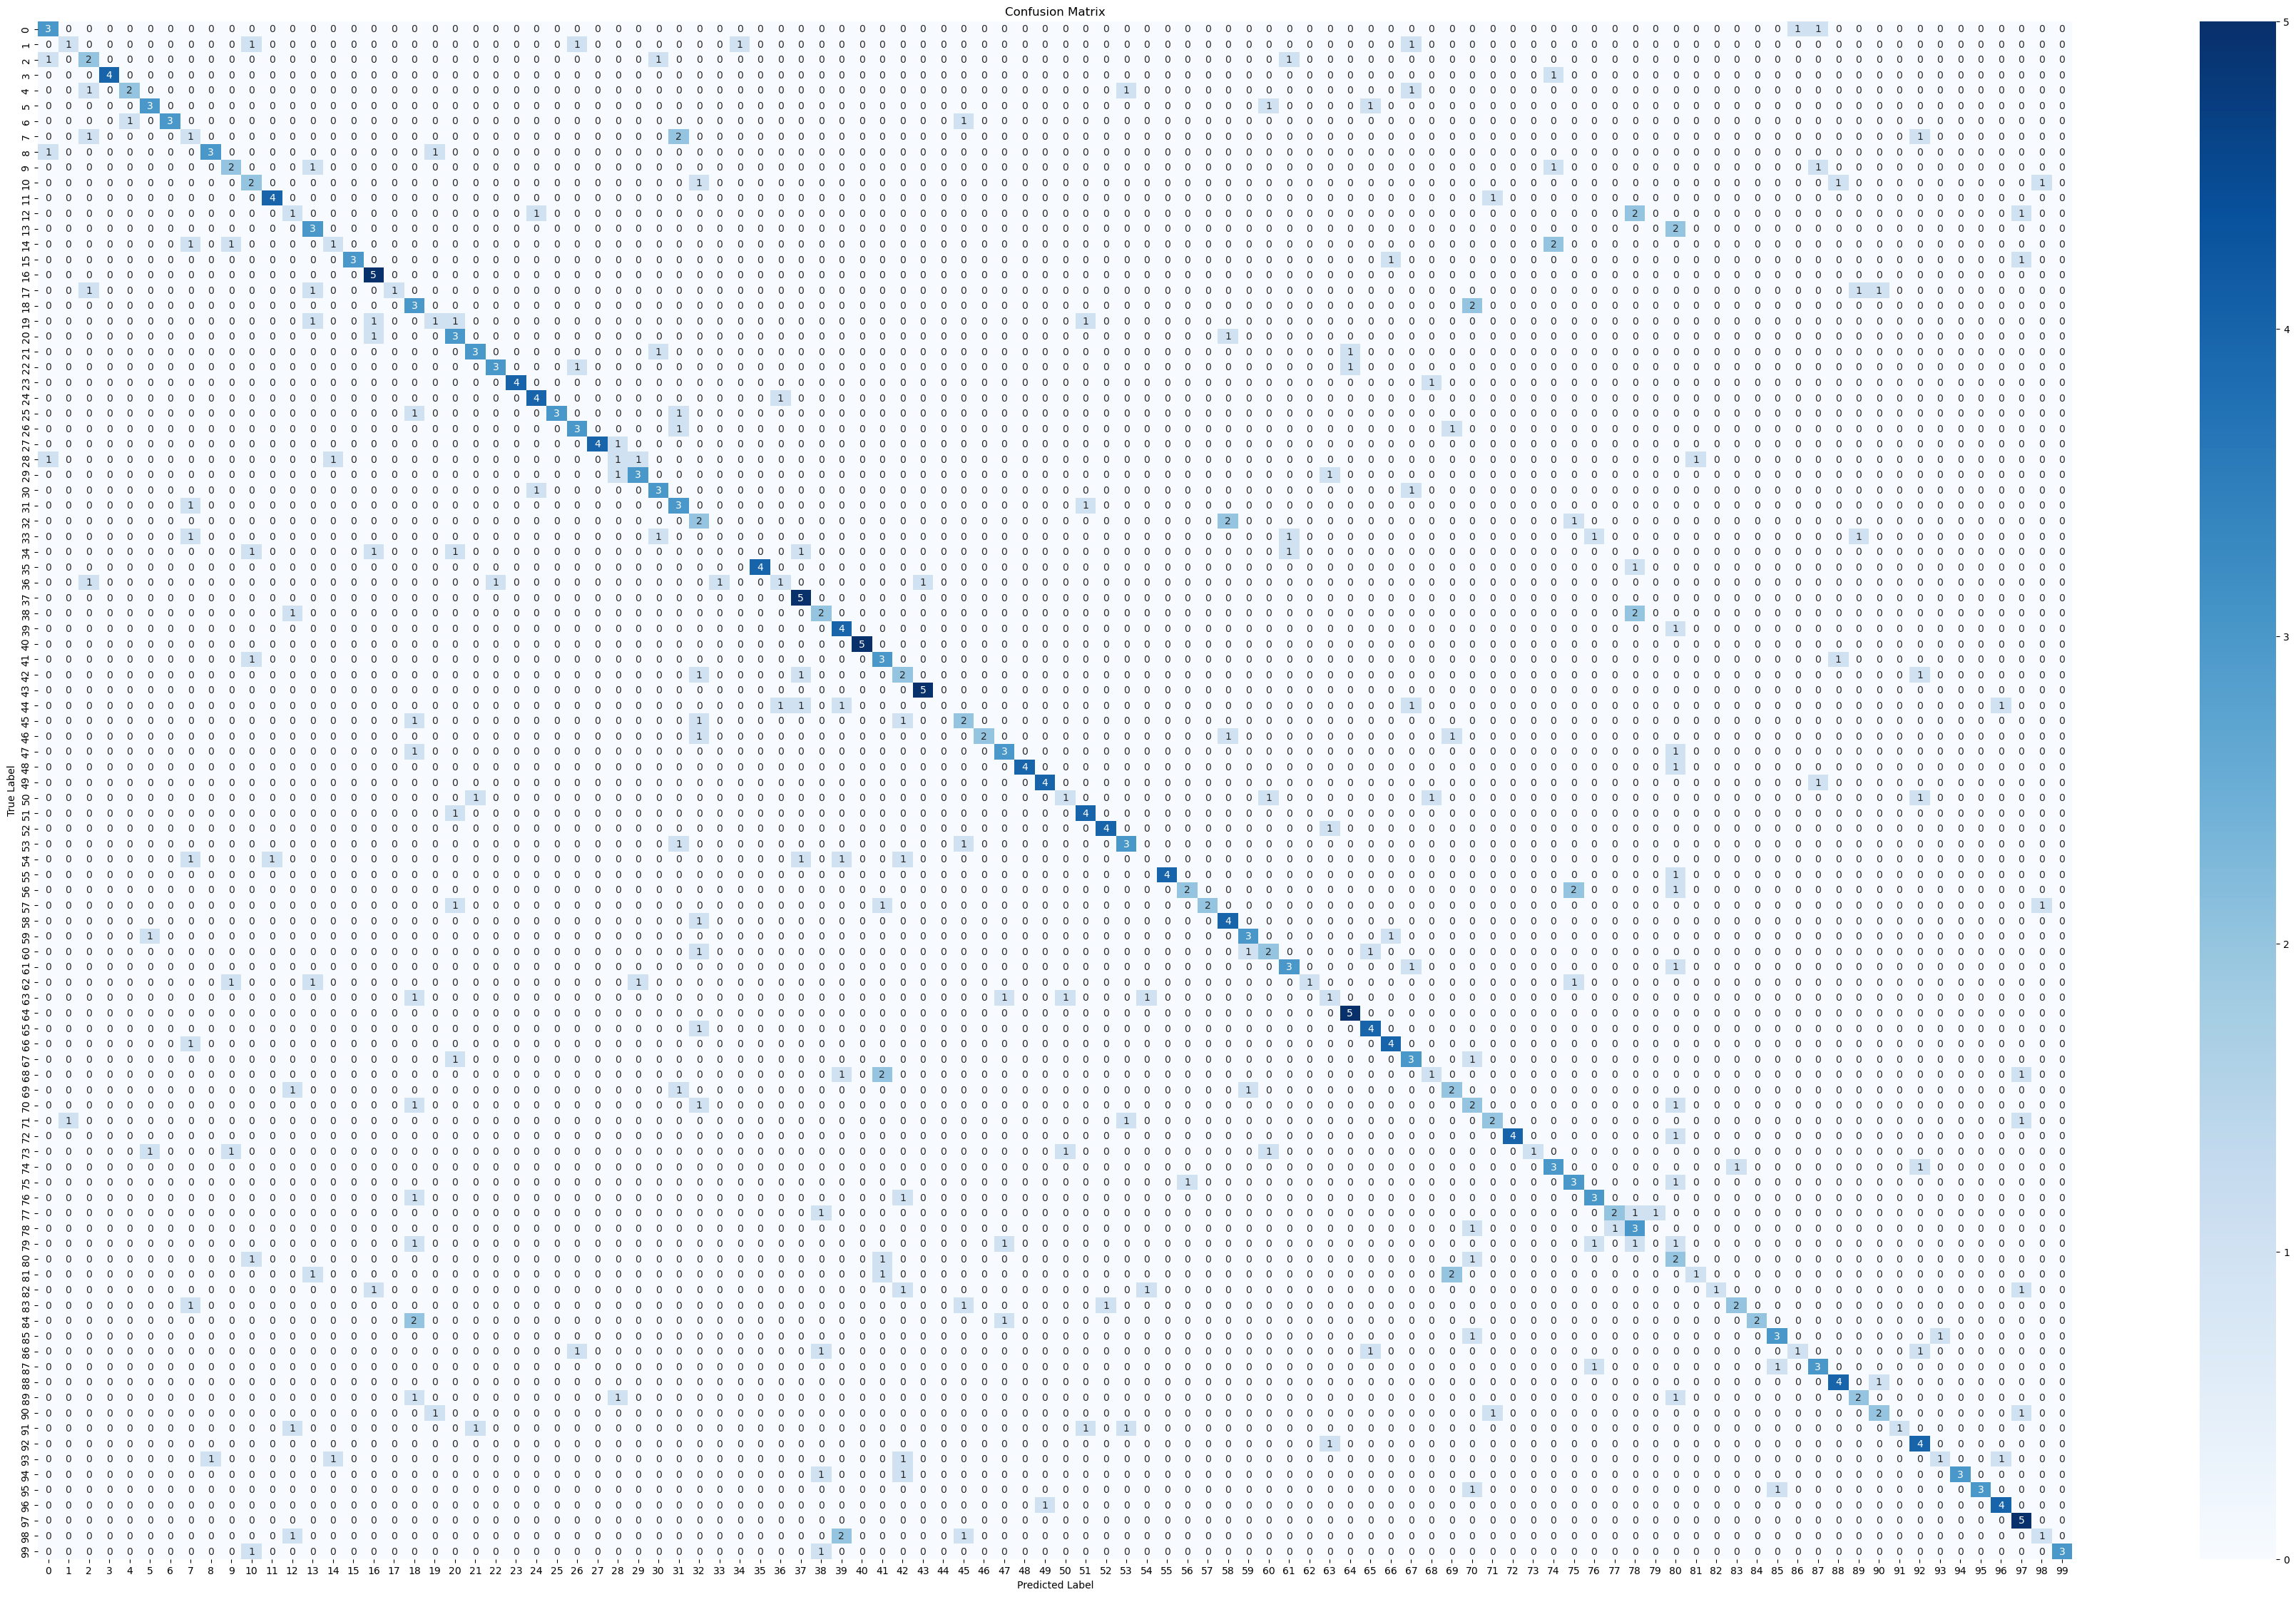

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")

# Visualize confusion matrix
plt.figure(figsize=(46,28))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 7.Save Model

In [ ]:
model.save(os.path.join('models','model1.h5'))

In [ ]:
new_model = load_model(os.path.join('models','model1.h5'))

In [ ]:
# test_results = new_model.evaluate(test_generator)

# print("Test Loss:", test_results[0])
# print("Test Accuracy:", test_results[1])

2/2 [==============================] - 1s 77ms/step - loss: 2.1994 - accuracy: 0.5140
Test Loss: 2.199380874633789
Test Accuracy: 0.5139999985694885


# 8.Test Visualization

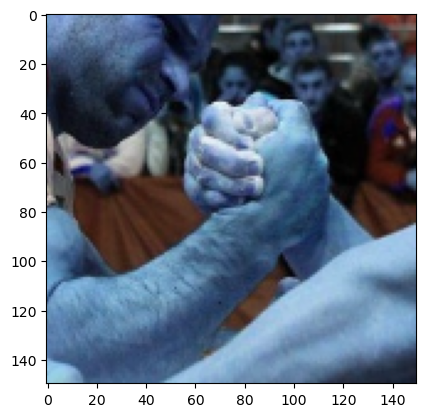

In [ ]:
img = cv2.imread('test/arm wrestling/1.jpg')
resized_img = tf.image.resize(img, (150, 150)).numpy().astype(int)
plt.imshow(resized_img, cmap='gray')
plt.show()

In [ ]:
img_for_prediction = np.expand_dims(resized_img/255, 0)

In [ ]:
predictions = new_model.predict(img_for_prediction)
predictions

1/1 [==============================] - 0s 20ms/step


array([[6.14597136e-03, 9.50803667e-08, 3.15114972e-04, 3.19751925e-05,
        2.59922410e-04, 2.72153684e-05, 5.87087470e-06, 1.69848117e-05,
        1.89902130e-06, 1.04645638e-04, 2.27055814e-08, 3.97021510e-03,
        1.02117219e-05, 3.24712205e-03, 1.68501865e-04, 1.50564173e-03,
        3.07514006e-06, 1.44175044e-03, 1.71652537e-05, 2.12635074e-04,
        2.13930934e-06, 7.45607167e-08, 2.62116391e-08, 1.08897715e-04,
        1.15790522e-06, 5.93358791e-03, 3.42659234e-07, 3.16641264e-04,
        5.29756711e-04, 3.92092159e-04, 4.65754820e-05, 1.20034083e-05,
        9.33354841e-06, 2.06359400e-05, 4.53496294e-04, 3.17749732e-06,
        5.82797895e-07, 3.13853036e-07, 9.75407893e-04, 3.53990174e-07,
        7.14839902e-03, 9.37474906e-05, 4.58110881e-05, 9.37607547e-06,
        2.82262859e-04, 4.15419563e-05, 6.42227023e-05, 5.91229822e-04,
        6.80969663e-08, 1.04918639e-04, 1.47150567e-04, 1.89637461e-07,
        6.12588832e-03, 1.58405273e-05, 2.07058911e-04, 2.211584

In [ ]:
predicted_class_index = np.argmax(predictions)
print("Predicted Class Index:", predicted_class_index)

Predicted Class Index: 82
